In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
projects = pd.read_csv("capital_projects.csv", index_col="id") 

In [3]:
print(projects['neighborhood'].unique(), "\n", len(projects['neighborhood'].unique()))

['Manchester' 'Banksville' 'Central Oakland' 'Greenfield' 'Swisshelm Park'
 'Allegheny West' 'South Side Flats' 'Squirrel Hill North'
 'Central Business District' 'Squirrel Hill South' 'Mount Washington'
 'Carrick' 'South Side Slopes' 'Beltzhoover' 'Brookline' 'South Oakland'
 'Lincoln Place' 'Troy Hill' 'Shadyside' 'Elliott' 'Larimer'
 'Crafton Heights' 'Central Lawrenceville' 'East Liberty'
 'Lower Lawrenceville' 'Sheraden' 'Windgap' 'Fineview'
 'Spring Hill-City View' 'Allegheny Center' 'Perry North' 'Polish Hill'
 'East Allegheny' 'Morningside' 'Homewood North' 'Allentown' 'Perry South'
 'Upper Lawrenceville' 'Bloomfield' 'Strip District' nan 'Hazelwood'
 'Homewood South' 'Garfield' 'Highland Park' 'Beechview'
 'Brighton Heights' 'Point Breeze' 'Upper Hill' 'Fairywood'
 'Crawford-Roberts' 'Lincoln-Lemington-Belmar' 'Terrace Village'
 'East Hills' 'Middle Hill' 'California-Kirkbride' 'Central Northside'
 'Overbrook' 'Glen Hazel' 'Hays' 'Stanton Heights' 'West End'
 'Spring Garden' '

In [4]:
neighborhood_and_budgets = projects.groupby('neighborhood').sum()['budgeted_amount'].round().sort_values(ascending=True)
neighborhood_and_budgets

neighborhood
East Hills                       5200.0
Fairywood                        5200.0
Glen Hazel                       7000.0
Upper Lawrenceville              8500.0
Garfield                        10200.0
Spring Garden                   36000.0
Esplen                          40800.0
California-Kirkbride            70000.0
Point Breeze                    85000.0
Windgap                         85000.0
Mt. Oliver                     100000.0
North Oakland                  115000.0
Point Breeze North             125000.0
Terrace Village                182262.0
Homewood North                 209300.0
Manchester                     213200.0
Mount Oliver Borough           250000.0
Arlington                      250000.0
Central Lawrenceville          260000.0
Bedford Dwellings              280750.0
Westwood                       325000.0
Middle Hill                    336662.0
Polish Hill                    350000.0
Crafton Heights                374626.0
Stanton Heights            

//Plot of neighborhood with associated budget

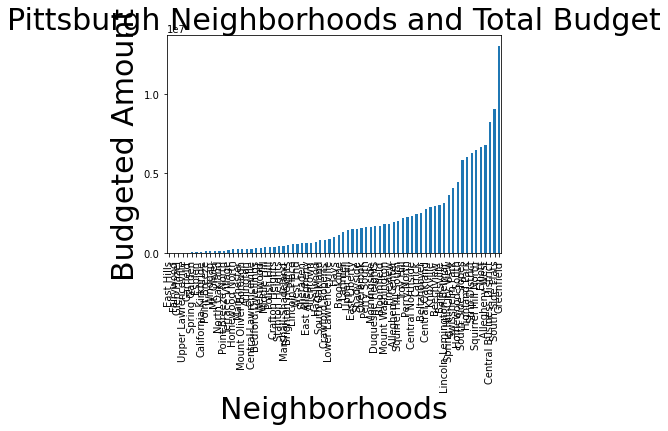

In [5]:
neighborhood_budget_plot = neighborhood_and_budgets.dropna()
neighborhood_budget_plot.plot(x = 'neighborhood', y = 'budgeted_amount', kind = 'bar')
plt.title('Pittsburgh Neighborhoods and Total Budget', size = 30)
plt.xlabel('Neighborhoods', size = 30)
plt.ylabel('Budgeted Amount', size = 30)
plt.rcParams["figure.figsize"] = (60,20)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
plt.show()

//Include only the projects which are completed or in-progress

In [6]:
neighborhood_budget_completed = projects[projects['status'].str.contains("Completed|In Progress")]
neighborhood_budget_completed = neighborhood_budget_completed.groupby('neighborhood').sum()['budgeted_amount'].round().sort_values(ascending=True)
neighborhood_budget_completed

neighborhood
Manchester                      3000.0
Garfield                        5200.0
Fairywood                       5200.0
East Hills                      5200.0
Homewood South                  8271.0
Upper Hill                     10969.0
Crawford-Roberts               23156.0
Point Breeze                   25000.0
Central Lawrenceville          30000.0
Sheraden                       35000.0
Esplen                         40800.0
Overbrook                      50000.0
Highland Park                  57250.0
Polish Hill                    60000.0
Terrace Village                82262.0
Windgap                        85000.0
Marshall-Shadeland             85200.0
Middle Hill                    86662.0
South Oakland                 122625.0
Perry North                   125000.0
Allentown                     127500.0
Lincoln Place                 148000.0
Crafton Heights               187313.0
Troy Hill                     216380.0
Mount Washington              250000.0
Stanton Heig

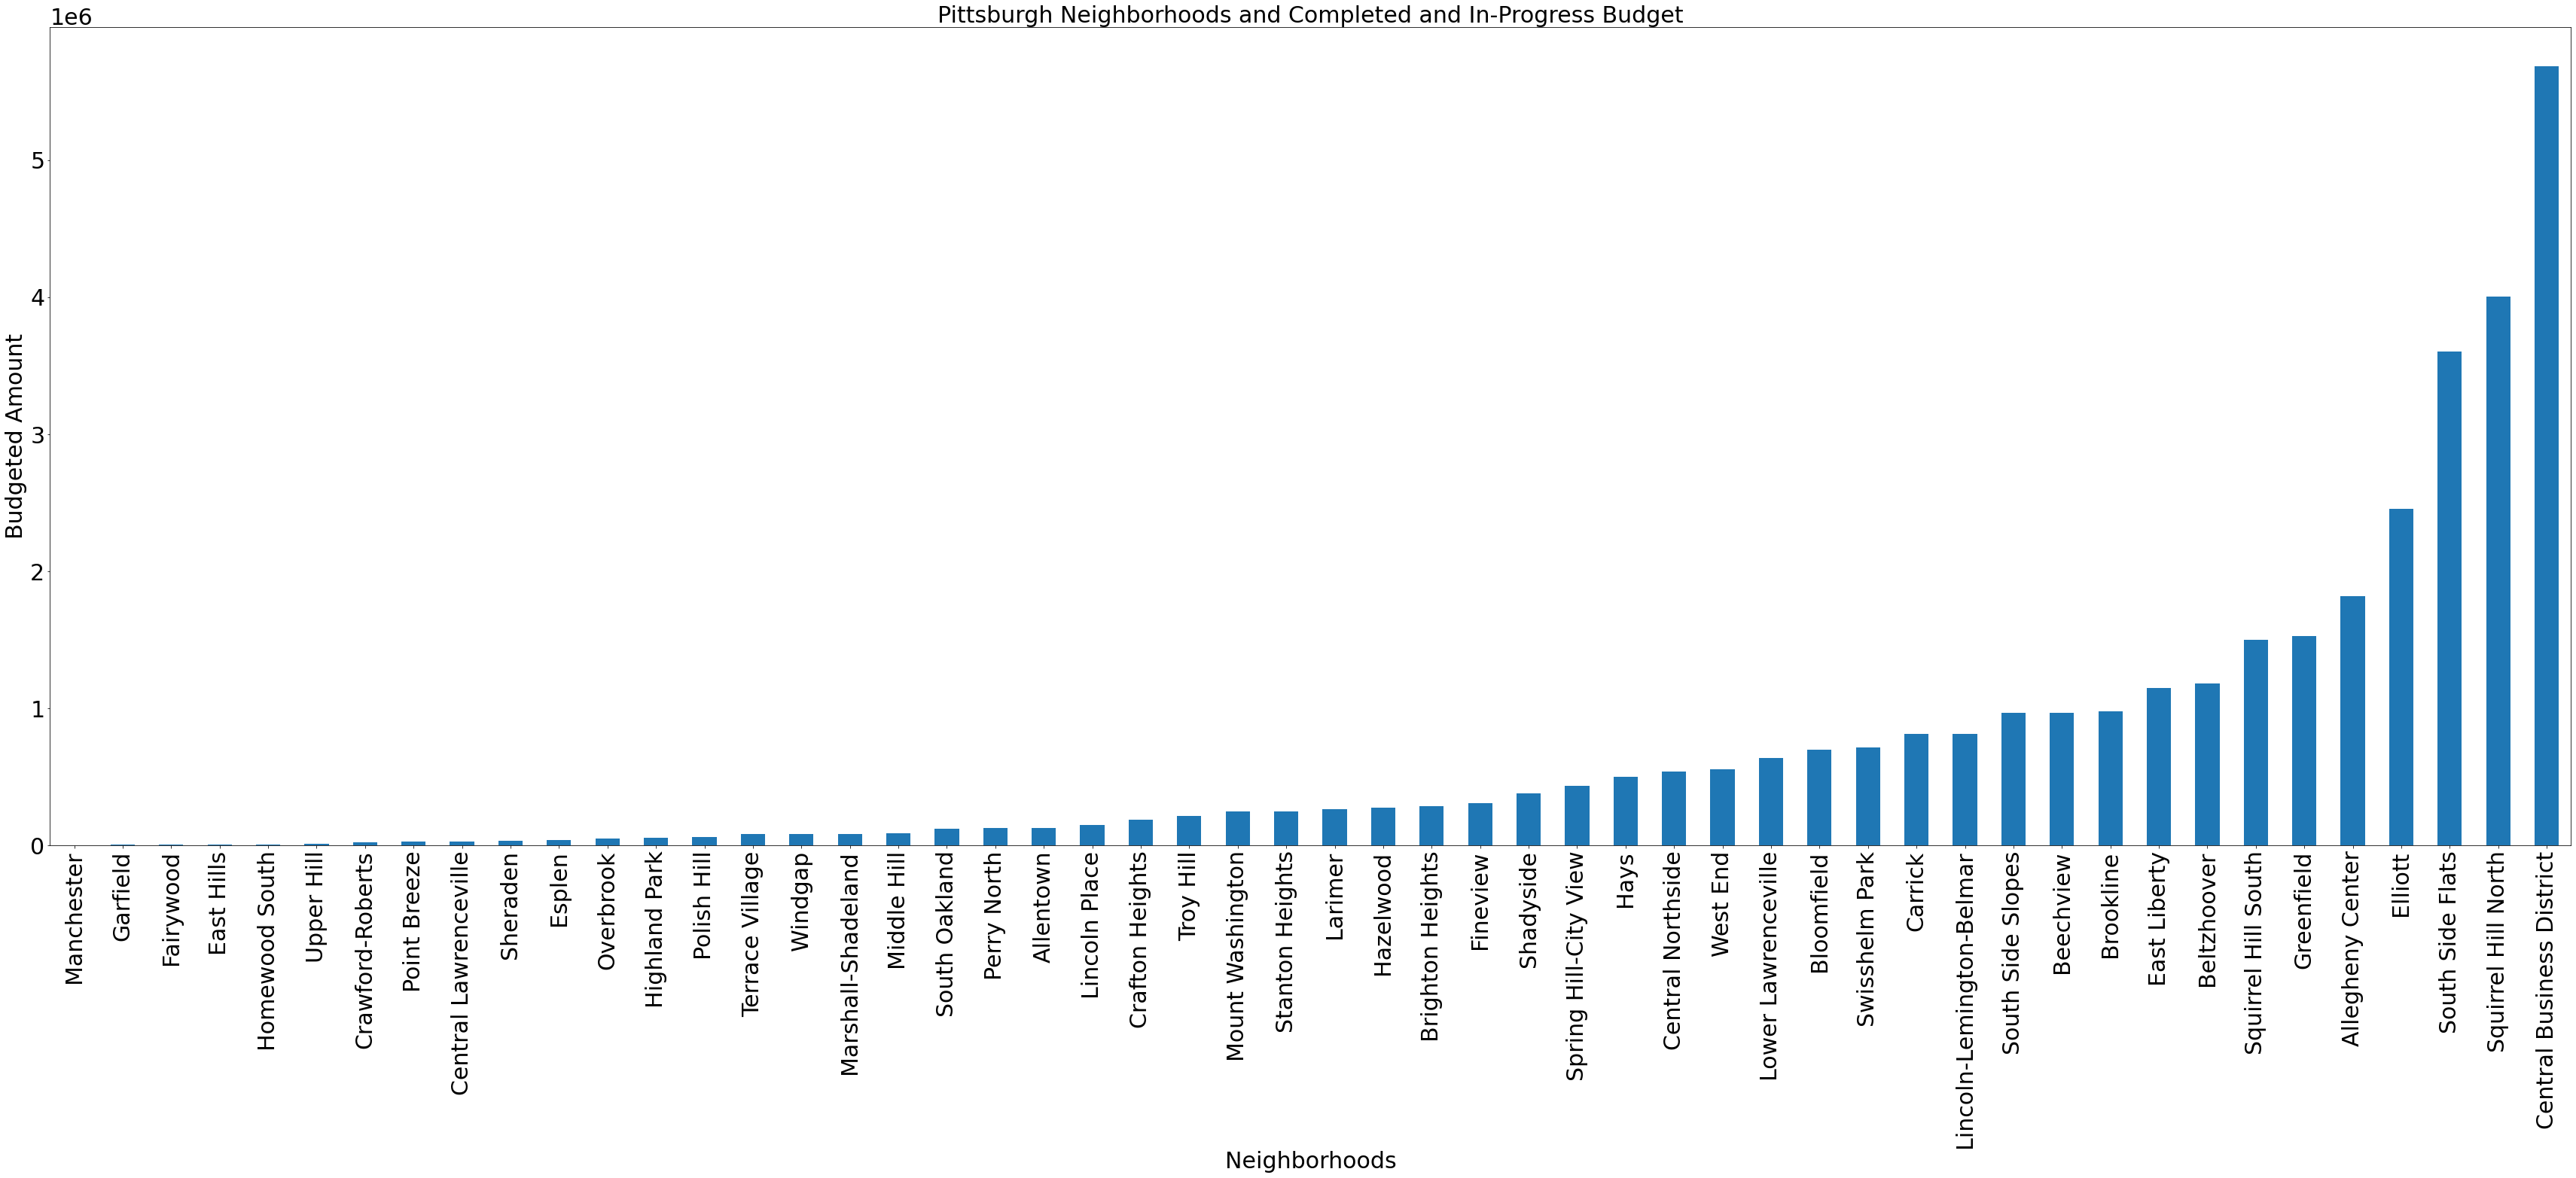

In [7]:
neighborhood_budget_completed_plot = neighborhood_budget_completed.dropna()
neighborhood_budget_completed_plot.plot(x = 'neighborhood', y = 'budgeted_amount', kind = 'bar')
plt.title('Pittsburgh Neighborhoods and Completed and In-Progress Budget', size = 30)
plt.xlabel('Neighborhoods', size = 30)
plt.ylabel('Budgeted Amount', size = 30)
plt.rcParams["figure.figsize"] = (60,20)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
plt.show()

# Conclusion:
If going by total budget, Greenfield is the neighborhood with the most amount of money invested into it. If going by already completed and in-progress project budgets, Central Business District would be the neighborhood with the most money invested into it.

//Extra Data
//Number of total projects in each neighborhood

In [8]:
print(len(projects))
print(projects.columns)

1002
Index(['name', 'task_description', 'area', 'budgeted_amount', 'status',
       'asset_id', 'asset_type', 'fiscal_year', 'start_date', 'inactive',
       'neighborhood', 'council_district', 'ward', 'tract',
       'public_works_division', 'pli_division', 'police_zone', 'fire_zone',
       'latitude', 'longitude'],
      dtype='object')


In [9]:
neighborhood_project_amount = projects['neighborhood'].value_counts().sort_values(ascending=True)
neighborhood_project_amount

Esplen                        1
Arlington                     1
Westwood                      1
Glen Hazel                    1
Mt. Oliver                    1
Mount Oliver Borough          1
Spring Garden                 1
East Hills                    1
Fairywood                     1
Point Breeze North            1
California-Kirkbride          1
Garfield                      2
Knoxville                     2
East Allegheny                2
Windgap                       2
Hays                          2
North Oakland                 2
Point Breeze                  2
Upper Lawrenceville           2
Marshall-Shadeland            3
Bedford Dwellings             3
Stanton Heights               3
Morningside                   3
Overbrook                     3
West End                      4
Crawford-Roberts              4
Central Lawrenceville         4
Allentown                     4
Swisshelm Park                4
Middle Hill                   4
Banksville                    4
Homewood

//Neighborhood and the cost of each project

In [10]:
projects2 = projects.groupby(['neighborhood','status','budgeted_amount']).size()
print(projects2)

neighborhood               status       budgeted_amount
Allegheny Center           Completed    4000.00            1
                                        5200.00            1
                                        38244.00           1
                                        55000.00           1
                                        57000.00           1
                                        91687.50           1
                           In Progress  90000.00           1
                                        735343.00          1
                                        741196.00          1
                           Planned      2500.00            1
                                        6000.00            1
                                        8000.00            1
                                        13000.00           1
                                        15600.00           1
                                        100000.00          1
Allegheny West             Pl